In [2]:
## DC Crime Analysis ##
#
# This following is a detailed anlysis of publicly available records of crime that have been committed in Washington, DC
# in recent years, specifically 2021 to early 2023.
# Records pulled from https://crimecards.dc.gov/
#

In [3]:
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import math

In [4]:
# Create data frame for crime data
crimeDF = pd.read_csv("DC-Crime-Data.csv")
crimeDF.head()


,NEIGHBORHOOD_CLUSTER,offensegroup,CENSUS_TRACT,LONGITUDE,END_DATE,offense-text,DISTRICT,SHIFT,YBLOCK,WARD,...,BLOCK,START_DATE,CCN,OFFENSE,OCTO_RECORD_ID,ANC,REPORT_DAT,METHOD,location,LATITUDE
0,cluster 34,property,7601.0,-76.980284,"5/19/2022, 4:31:00 PM",burglary,6.0,evening,133517.00,8.0,...,1700 - 1721 block of r street se,"5/19/2022, 3:38:00 PM",22070456,burglary,22070456-01,8A,"5/19/2022, 8:15:23 PM",others,"38.8694752192276,-76.9802836986735",38.869475
1,cluster 19,property,9505.0,-77.002712,"5/19/2022, 6:40:00 PM",theft f/auto,4.0,evening,144163.00,4.0,...,6200 - 6299 block of new hampshire avenue ne,"5/19/2022, 6:17:00 PM",22070539,theft f/auto,22070539-01,4B,"5/19/2022, 10:31:51 PM",others,"38.965379521468,-77.0027116105736",38.965380
2,cluster 2,property,3100.0,-77.026168,"5/19/2022, 6:15:00 PM",motor vehicle theft,3.0,evening,140050.00,1.0,...,3000 - 3099 block of sherman avenue nw,"5/19/2022, 6:10:00 PM",22070545,motor vehicle theft,22070545-01,1A,"5/19/2022, 7:06:54 PM",others,"38.9283255689672,-77.026167860671",38.928326
3,cluster 3,property,4401.0,-77.031952,"5/19/2022, 8:34:00 PM",theft/other,3.0,evening,138854.00,1.0,...,2000 - 2099 block of 14th street nw,"5/19/2022, 8:02:00 PM",22070596,theft/other,22070596-01,1B,"5/19/2022, 8:58:39 PM",others,"38.917550178367,-77.0319524841605",38.917550
4,cluster 15,property,1304.0,-77.058081,"5/25/2022, 1:25:00 PM",theft/other,2.0,day,140772.69,3.0,...,3319 - 3499 block of connecticut avenue nw,"5/25/2022, 12:30:00 PM",22073522,theft/other,22073522-01,3C,"5/25/2022, 2:09:06 PM",others,"38.9348242806608,-77.0580805326973",38.934824


In [5]:
# More readable column names
crimeDF.columns = ["Cluster", "Offense Group", "Census Tract", "Longitude", "End Date/Time", "Offense", "District", "Shift", "Y-Block", "Ward", "Year", "Offense Key", "Bid", "Sector", "PSA", "UCR Rank", "Block Group", "Voting Precinct", "X-Block", "Block", "Start Date/Time", "ID", "Offense", "ID2", "ANC", "Report Date/Time", "Method", "Location", "Latitude"]
crimeDF.head()

,Cluster,Offense Group,Census Tract,Longitude,End Date/Time,Offense,District,Shift,Y-Block,Ward,...,Block,Start Date/Time,ID,Offense,ID2,ANC,Report Date/Time,Method,Location,Latitude
0,cluster 34,property,7601.0,-76.980284,"5/19/2022, 4:31:00 PM",burglary,6.0,evening,133517.00,8.0,...,1700 - 1721 block of r street se,"5/19/2022, 3:38:00 PM",22070456,burglary,22070456-01,8A,"5/19/2022, 8:15:23 PM",others,"38.8694752192276,-76.9802836986735",38.869475
1,cluster 19,property,9505.0,-77.002712,"5/19/2022, 6:40:00 PM",theft f/auto,4.0,evening,144163.00,4.0,...,6200 - 6299 block of new hampshire avenue ne,"5/19/2022, 6:17:00 PM",22070539,theft f/auto,22070539-01,4B,"5/19/2022, 10:31:51 PM",others,"38.965379521468,-77.0027116105736",38.965380
2,cluster 2,property,3100.0,-77.026168,"5/19/2022, 6:15:00 PM",motor vehicle theft,3.0,evening,140050.00,1.0,...,3000 - 3099 block of sherman avenue nw,"5/19/2022, 6:10:00 PM",22070545,motor vehicle theft,22070545-01,1A,"5/19/2022, 7:06:54 PM",others,"38.9283255689672,-77.026167860671",38.928326
3,cluster 3,property,4401.0,-77.031952,"5/19/2022, 8:34:00 PM",theft/other,3.0,evening,138854.00,1.0,...,2000 - 2099 block of 14th street nw,"5/19/2022, 8:02:00 PM",22070596,theft/other,22070596-01,1B,"5/19/2022, 8:58:39 PM",others,"38.917550178367,-77.0319524841605",38.917550
4,cluster 15,property,1304.0,-77.058081,"5/25/2022, 1:25:00 PM",theft/other,2.0,day,140772.69,3.0,...,3319 - 3499 block of connecticut avenue nw,"5/25/2022, 12:30:00 PM",22073522,theft/other,22073522-01,3C,"5/25/2022, 2:09:06 PM",others,"38.9348242806608,-77.0580805326973",38.934824


In [6]:
# Need to filter useful columns in a uniform matter. Offense column reads as dataframe instead of series, so we need
# to convert it and then construct new dataframe with the columns we want.

startDateList = crimeDF["Start Date/Time"]
endDateList = crimeDF["End Date/Time"]
reportDateList = crimeDF["Report Date/Time"]
yearList = crimeDF["Year"]

latList = crimeDF["Latitude"]
longList = crimeDF["Longitude"]
blockList = crimeDF["Block"]
districtList = crimeDF["District"]
shiftList = crimeDF["Shift"]
ogList = crimeDF["Offense Group"]
methodList = crimeDF["Method"]
wardList = crimeDF["Ward"]
offenseList = crimeDF["Offense"]
offenseList.columns = ["Offense", "Offense-filter"]
offenseList = offenseList["Offense"]

filteredCrimeDict = {"Offense": offenseList,
                   "Offense Group": ogList,
                   "Block": blockList,
                   "Shift": shiftList,
                   "Start Date/Time": startDateList,
                   "End Date/Time": endDateList,
                   "Report Date/Time": reportDateList,
                   "Year": yearList,
                   "Ward": wardList,
                   "Latitude": latList,
                   "Longitude": longList}

crimeDF = pd.DataFrame(filteredCrimeDict)
        
crimeDF.head()

,Offense,Offense Group,Block,Shift,Start Date/Time,End Date/Time,Report Date/Time,Year,Ward,Latitude,Longitude
0,burglary,property,1700 - 1721 block of r street se,evening,"5/19/2022, 3:38:00 PM","5/19/2022, 4:31:00 PM","5/19/2022, 8:15:23 PM",2022,8.0,38.869475,-76.980284
1,theft f/auto,property,6200 - 6299 block of new hampshire avenue ne,evening,"5/19/2022, 6:17:00 PM","5/19/2022, 6:40:00 PM","5/19/2022, 10:31:51 PM",2022,4.0,38.965380,-77.002712
2,motor vehicle theft,property,3000 - 3099 block of sherman avenue nw,evening,"5/19/2022, 6:10:00 PM","5/19/2022, 6:15:00 PM","5/19/2022, 7:06:54 PM",2022,1.0,38.928326,-77.026168
3,theft/other,property,2000 - 2099 block of 14th street nw,evening,"5/19/2022, 8:02:00 PM","5/19/2022, 8:34:00 PM","5/19/2022, 8:58:39 PM",2022,1.0,38.917550,-77.031952
4,theft/other,property,3319 - 3499 block of connecticut avenue nw,day,"5/25/2022, 12:30:00 PM","5/25/2022, 1:25:00 PM","5/25/2022, 2:09:06 PM",2022,3.0,38.934824,-77.058081


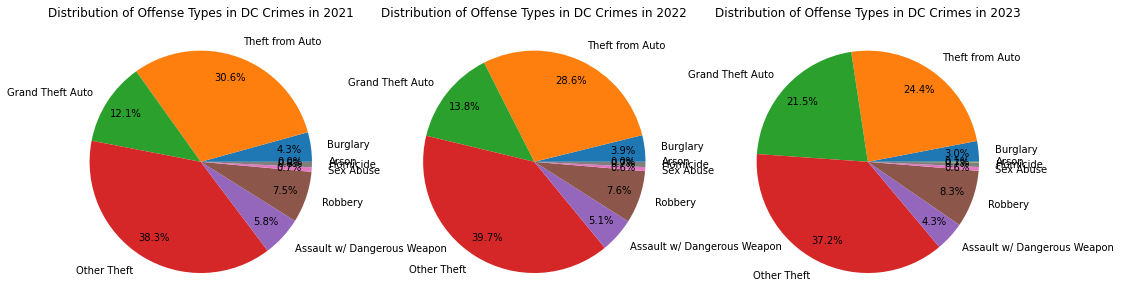

In [7]:
offenseCounts = []
offenseTypes = ['burglary', 'theft f/auto', 'motor vehicle theft', 'theft/other', 'assault w/dangerous weapon', 'robbery', 'sex abuse', 'homicide', 'arson']
for t in offenseTypes:
    offenseCounts.append(len(crimeDF[(crimeDF["Offense"] == t)]))



offenseCounts2016 = []
for t in offenseTypes:
    offenseCounts2016.append(len(crimeDF[((crimeDF["Offense"] == t) & (crimeDF["Year"] == 2016))]))

offenseCounts2017 = []
for t in offenseTypes:
    offenseCounts2017.append(len(crimeDF[((crimeDF["Offense"] == t) & (crimeDF["Year"] == 2017))]))
    
offenseCounts2018 = []
for t in offenseTypes:
    offenseCounts2018.append(len(crimeDF[((crimeDF["Offense"] == t) & (crimeDF["Year"] == 2018))]))

offenseCounts2019 = []
for t in offenseTypes:
    offenseCounts2019.append(len(crimeDF[((crimeDF["Offense"] == t) & (crimeDF["Year"] == 2019))]))

offenseCounts2020 = []
for t in offenseTypes:
    offenseCounts2020.append(len(crimeDF[((crimeDF["Offense"] == t) & (crimeDF["Year"] == 2020))]))

offenseCounts2021 = []
for t in offenseTypes:
    offenseCounts2021.append(len(crimeDF[((crimeDF["Offense"] == t) & (crimeDF["Year"] == 2021))]))

offenseCounts2022 = []
for t in offenseTypes:
    offenseCounts2022.append(len(crimeDF[((crimeDF["Offense"] == t) & (crimeDF["Year"] == 2022))]))

offenseCounts2023 = []
for t in offenseTypes:
    offenseCounts2023.append(len(crimeDF[((crimeDF["Offense"] == t) & (crimeDF["Year"] == 2023))]))
                         
# Once we use the correct labels for the counts, we can make them pretty
offenseTypes = ['Burglary', 'Theft from Auto', 'Grand Theft Auto', 'Other Theft', 'Assault w/ Dangerous Weapon', 'Robbery', 'Sex Abuse', 'Homicide', 'Arson']

#explode=(0,0,0,0,0,0,0,0,0)


plt.figure(figsize=(7,7))
plt.title("Distribution of Offense Types in DC Crimes since 2021")
plt.pie(offenseCounts, labels = offenseTypes, autopct = '%1.1f%%', pctdistance = 0.8, labeldistance = 1.15)


plt.subplot(1,3,1)
plt.title("Distribution of Offense Types in DC Crimes in 2021")
plt.pie(offenseCounts2021, labels = offenseTypes, autopct = '%1.1f%%', pctdistance = 0.8, labeldistance = 1.15)

plt.subplot(1,3,2)
plt.title("Distribution of Offense Types in DC Crimes in 2022")
plt.pie(offenseCounts2022, labels = offenseTypes, autopct = '%1.1f%%', pctdistance = 0.8, labeldistance = 1.15)

plt.subplot(1,3,3)
plt.title("Distribution of Offense Types in DC Crimes in 2023")
plt.pie(offenseCounts2023, labels = offenseTypes, autopct = '%1.1f%%', pctdistance = 0.8, labeldistance = 1.15)

plt.subplots_adjust(bottom=0.1, right=2, top=0.9)

plt.show()

([<matplotlib.patches.Wedge at 0x7fc70368bf40>,
 [Text(-1.1720006164728765, 0.562507382162401, 'Property'),
  Text(1.1720006428057461, -0.5625073272970922, 'Violent')],
 [Text(-0.6310772550238565, 0.302888590395139, '85.8%'),
  Text(0.631077269203094, -0.3028885608522804, '14.2%')])

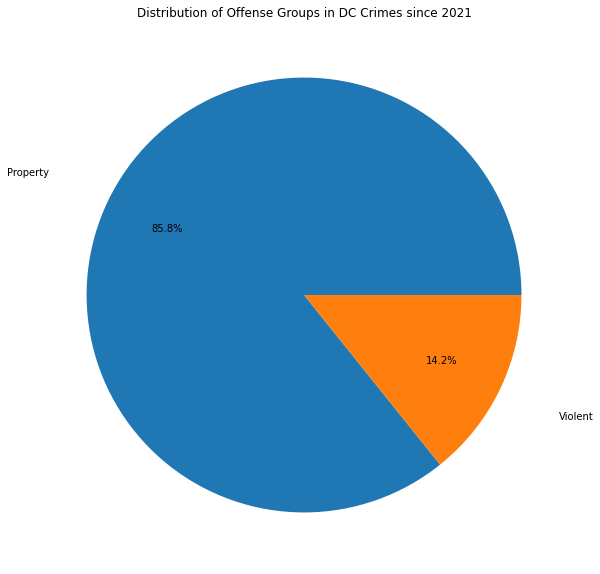

In [8]:
ogCounts = []
ogTypes = ['property', 'violent']
for og in ogTypes:
    ogCounts.append(len(crimeDF[(crimeDF["Offense Group"] == og)]))
                         
# Once we use the correct labels for the counts, we can make them pretty
ogTypes = ['Property', 'Violent']

explode=(0,0,0,0,0,0,0,0.1,0)
plt.figure(figsize=(20,10))
plt.title("Distribution of Offense Groups in DC Crimes since 2021")
plt.pie(ogCounts, labels = ogTypes, autopct = '%1.1f%%', pctdistance = 0.7, labeldistance = 1.3)

{'evening': 23535, 'day': 22958, 'midnight': 11841}


([<matplotlib.patches.Wedge at 0x7fc6e17d4880>,
 [Text(0.32855173256847353, 1.0497874827917575, 'Day'),
  Text(-0.8889705618361969, -0.6478667611389218, 'Evening'),
  Text(0.8838138803429043, -0.6548839782077575, 'Night')],
 [Text(0.20907837527084677, 0.668046579958391, '40.3%'),
  Text(-0.5657085393503071, -0.41227884799749565, '39.4%'),
  Text(0.5624270147636663, -0.4167443497685729, '20.3%')])

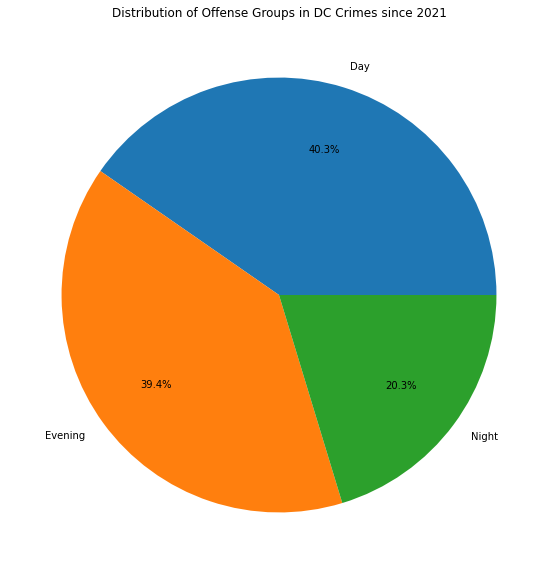

In [9]:
shiftCounts = []
shiftTypes = ['evening', 'day', 'midnight']
for sh in shiftTypes:
    shiftCounts.append(len(crimeDF[(crimeDF["Shift"] == sh)]))

shiftDict = {}
for sh in shiftList:
    if(sh in shiftDict):
        shiftDict[sh] += 1
    else:
        shiftDict[sh] = 1
        
print(shiftDict)
                         
# Once we use the correct labels for the counts, we can make them pretty
shiftTypes = ['Day', 'Evening', 'Night']

explode=(0,0,0,0,0,0,0,0.1,0)
plt.figure(figsize=(20,10))
plt.title("Distribution of Offense Groups in DC Crimes since 2021")
plt.pie(shiftCounts, labels = shiftTypes, autopct = '%1.1f%%', pctdistance = 0.7, labeldistance = 1.1)


<BarContainer object of 29 artists>

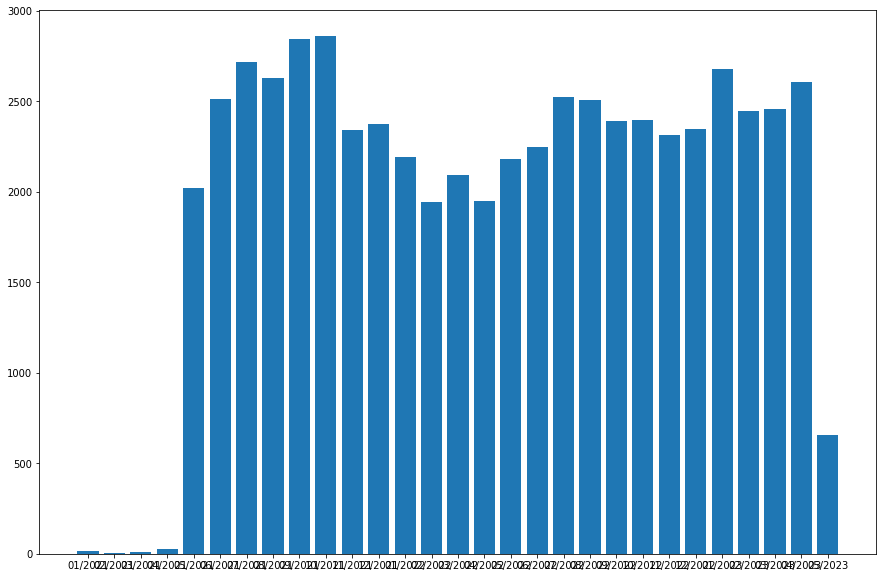

In [10]:
countPerMonth = {}

for date in startDateList:
    fullMonthYear = str(date).split(",")[0]
    if(not fullMonthYear == "nan"):
        monthYearSplit = fullMonthYear.split("/")
        monthYearKey = str(str(monthYearSplit[0]) + "/" + str(monthYearSplit[2]))
        year = str(monthYearSplit[2])
        if(str(year) in ["2021", "2022", "2023"]):
            if(len(monthYearKey) < 7):
                monthYearKey = "0" + monthYearKey
            if(monthYearKey not in countPerMonth):
                countPerMonth[monthYearKey] = 1
            else:
                countPerMonth[monthYearKey] += 1

dateKeysByOrder = list(countPerMonth.keys())
dateKeysByOrder.sort(key=lambda date: datetime.strptime(date, "%m/%Y"))

dateCounts = []
for date in dateKeysByOrder:
    dateCounts.append(countPerMonth[date])

plt.figure(figsize=(15,10))
plt.bar(dateKeysByOrder, dateCounts)

In [11]:
countPerYear = {}

for year in yearList:
    fullDate = str(date).split(",")[0]
    if(not year == "nan"):
        year = str(year)
        if(year not in countPerYear):
            countPerYear[year] = 1
        else:
            countPerYear[year] += 1
    

countPerYear

{'2022': 27132, '2021': 20149, '2023': 11053}